In [1]:
from env import VanillaEnv, CrafterReplayBuffer
import numpy as np
import matplotlib.pyplot as plt
import os
import random


c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\worldgen.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tunnels = np.zeros(world.area, np.bool)


Done! Episode Reward:  0.09999999999999998
(3, 64, 64)


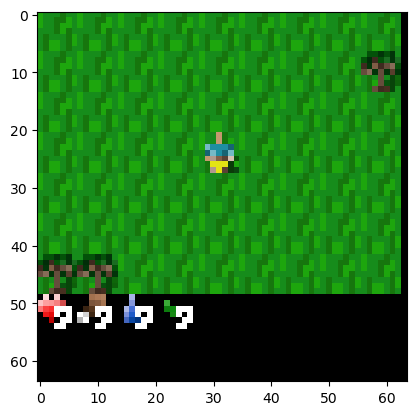

In [2]:
env =  VanillaEnv(seed=4)
state = env.reset()
done = False
rewards = []
frames_arr = []

while not done:
    action = np.random.randint(low=0, high=17)
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[0], 0, -1), vmin=0., vmax=1.)
        break

In [3]:
buffer = CrafterReplayBuffer('cpu', 0, './dataset')

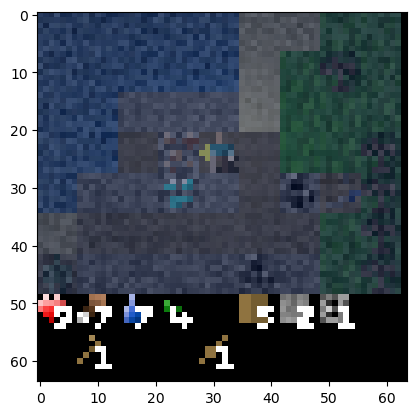

In [4]:
image, action = buffer.sample(1)
plt.imshow(np.moveaxis(image.numpy().squeeze(), 0, -1), vmin=0., vmax=1.)

c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\worldgen.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tunnels = np.zeros(world.area, np.bool)


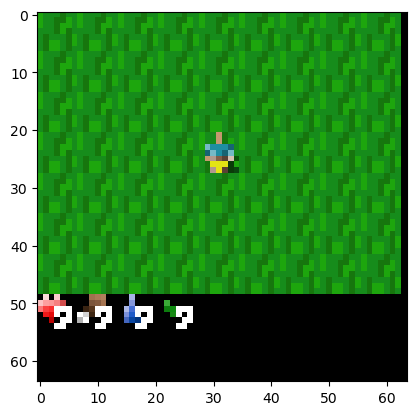

In [5]:
import gym
import crafter

env = env = crafter.Env(seed="6alZBPJBjvEr2YMpv6VDbP")  # Or CrafterNoReward-v1
env = crafter.Recorder(
  env, './path/to/logdir',
  save_stats=True,
  save_video=False,
  save_episode=False,
)
obs = env.reset()
plt.imshow(obs)


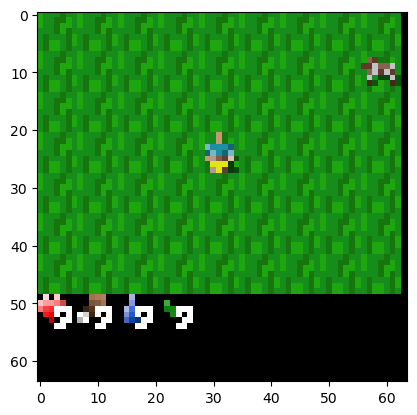

In [6]:
with np.load("./dataset" + os.sep + "6alZBPJBjvEr2YMpv6VDbP.npz") as data:
    plt.imshow(data['image'][0])

In [7]:
print(env.action_space)

Discrete(17)


In [8]:
from policy import ActorNet

model = ActorNet()

X, y = buffer.sample(23)
print(X.shape)
print(X.dtype)

model.forward(X, contrastive=False)

torch.Size([23, 3, 64, 64])
torch.float32


tensor([[-0.0516,  0.0160,  0.0177, -0.0126,  0.0329, -0.0571, -0.0068, -0.0168,
         -0.0111,  0.0604, -0.0066,  0.0542,  0.0696,  0.0418,  0.0284,  0.0621,
         -0.0135],
        [-0.0544,  0.0175,  0.0189, -0.0123,  0.0315, -0.0575, -0.0093, -0.0162,
         -0.0113,  0.0619, -0.0054,  0.0499,  0.0676,  0.0467,  0.0291,  0.0652,
         -0.0114],
        [-0.0568,  0.0160,  0.0165, -0.0143,  0.0313, -0.0547, -0.0080, -0.0185,
         -0.0140,  0.0606, -0.0055,  0.0505,  0.0732,  0.0400,  0.0269,  0.0630,
         -0.0118],
        [-0.0487,  0.0148,  0.0189, -0.0144,  0.0362, -0.0527, -0.0051, -0.0189,
         -0.0140,  0.0616, -0.0069,  0.0507,  0.0681,  0.0447,  0.0268,  0.0627,
         -0.0172],
        [-0.0536,  0.0156,  0.0231, -0.0147,  0.0258, -0.0554, -0.0101, -0.0162,
         -0.0107,  0.0603, -0.0007,  0.0549,  0.0677,  0.0411,  0.0291,  0.0673,
         -0.0135],
        [-0.0529,  0.0161,  0.0197, -0.0116,  0.0329, -0.0575, -0.0078, -0.0180,
         -0.01